In [8]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [9]:
#Dados gerados da mesma forma que para o SVC
Xtrain = np.load('Dados2/Xtreino2.npy').reshape(-1,28*28*3)
ytrain = np.load('Dados2/ytreino2.npy')
Xtest = np.load('Dados2/Xteste2.npy').reshape(-1,28*28*3)
ytest = np.load('Dados2/yteste2.npy')

In [10]:
# clf = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
}
# grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1, scoring='balanced_accuracy')
# grid_search.best_params_

In [11]:
#Depois do grid search este foi o melhor modelo
grid_search = RandomForestClassifier(n_estimators=200,max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='sqrt')

In [12]:
grid_search.fit(Xtrain, ytrain)

RandomForestClassifier(n_estimators=200)

In [13]:
y_pred = grid_search.predict(Xtest)
print("Balanced ACC SVC->", round(balanced_accuracy_score(ytest, y_pred),3))

Balanced ACC SVC-> 0.727


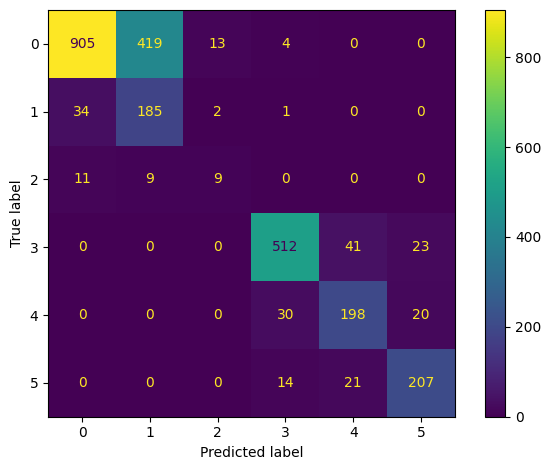

In [15]:
cm = confusion_matrix(ytest, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2,3,4,5])
disp.plot()
plt.tight_layout()
plt.savefig('CMRF2.eps', format='eps')
plt.show()